## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

1. id - unique identified for a house 
2. Date - house was sold
3. Price - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/milen/Flatiron-April05/Final_Project2/house_sale_model/data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Scrubbing the data
### Cleaning based on info
Key observations from here:

1. Datatype of date: String
2. Waterfront is missing values
3. Sqft_basement has a datatype of object
4. yr_renovbated missing values
5. yr_renovated is float
6. Dealing with the date column

## Dealing with date column

In [4]:
df.date.value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
8/30/2014       1
2/15/2015       1
11/30/2014      1
5/17/2014       1
3/8/2015        1
Name: date, Length: 372, dtype: int64


By looking at the most common values in the Date column, we see that houses seem to sold more in late spring and early summer. Lets take another look at this and see if we can extract the month in any way.

In [5]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:xlabel='month', ylabel='count'>

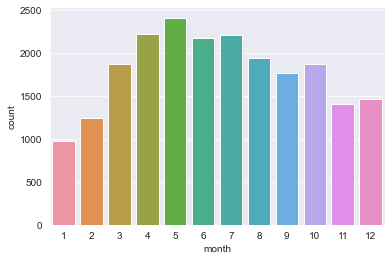

In [7]:
sns.countplot(x = "month", data = df)


So there appears to be certain months where more houses are sold. Lets take a look at the avg price of the homes during each month to see if there is any significant change by waiting to sell a house in the summer months.

<AxesSubplot:xlabel='month', ylabel='price'>

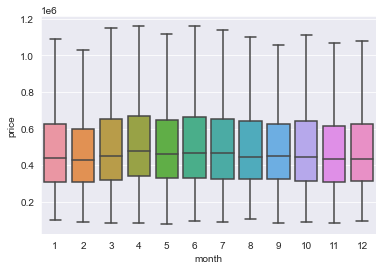

In [8]:
sns.boxplot(x = "month", y = "price", data = df, showfliers = False)

<AxesSubplot:xlabel='month', ylabel='price'>

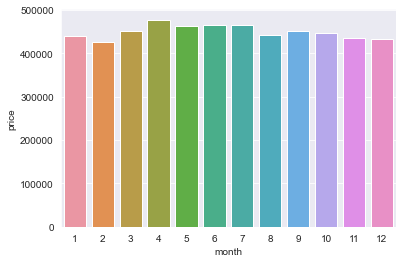

In [9]:
sns.barplot(x = "month", y = "price", data = df.groupby("month").median().reset_index())

In [10]:
df.groupby("month").median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month,,,,,,,,,,,,,,,,,,,
1,3.905036e+09,438500.0,3.0,2.25,1890.0,7800.0,1.0,0.0,0.0,3.0,7.0,1570.0,1974.0,0.0,98065.0,47.55950,-122.2310,1800.0,7700.0
2,3.997500e+09,426500.0,3.0,2.00,1830.0,7667.0,1.0,0.0,0.0,3.0,7.0,1489.0,1974.0,0.0,98059.0,47.56120,-122.2290,1800.0,7638.0
3,3.905040e+09,450000.0,3.0,2.25,1870.0,7560.0,1.0,0.0,0.0,3.0,7.0,1540.0,1973.0,0.0,98065.0,47.56480,-122.2260,1820.0,7647.0
4,4.022900e+09,477000.0,3.0,2.25,1900.0,7500.0,1.5,0.0,0.0,3.0,7.0,1540.0,1976.0,0.0,98072.0,47.56860,-122.2290,1840.0,7560.0
5,3.905005e+09,462000.0,3.0,2.25,1930.0,7498.0,1.0,0.0,0.0,3.0,7.0,1540.0,1974.0,0.0,98072.0,47.57870,-122.2365,1840.0,7551.5
6,3.904925e+09,465000.0,3.0,2.25,1980.0,7700.0,1.5,0.0,0.0,3.0,8.0,1600.0,1975.0,0.0,98072.0,47.57605,-122.2290,1890.0,7720.0
7,3.885801e+09,465000.0,3.0,2.25,1950.0,7695.0,1.5,0.0,0.0,3.0,8.0,1610.0,1977.0,0.0,98059.0,47.57400,-122.2150,1870.0,7650.0
8,4.016800e+09,442200.0,3.0,2.25,1940.0,7810.0,1.0,0.0,0.0,3.0,7.0,1590.0,1976.0,0.0,98059.0,47.57720,-122.2220,1860.0,7755.0
9,3.826501e+09,450000.0,3.0,2.25,1920.0,7620.0,1.5,0.0,0.0,3.0,7.0,1580.0,1974.0,0.0,98065.0,47.57400,-122.2350,1830.0,7503.0


Price of the same avg house changes by about $30k if you wait to see in the summer months. At this point it becomes clear that the month feature gives us a lot more information than the actual date. So we will be dropping date and just using the month from this point.

In [11]:
df.drop(columns=['date'], inplace=True, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Dealing with missing values in waterfront

In [13]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

About 2300 values missing from waterfront, but we only have 146 houses with a waterfront. We need to explore whether we even need to include this variable. Lets check the avg prices of homes with a waterfront vs ones without a waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

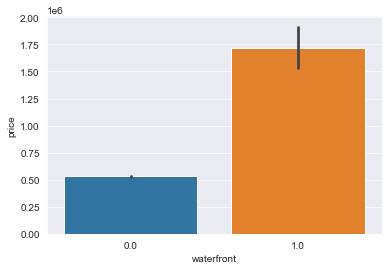

In [15]:
sns.barplot(x = "waterfront", y = "price", data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

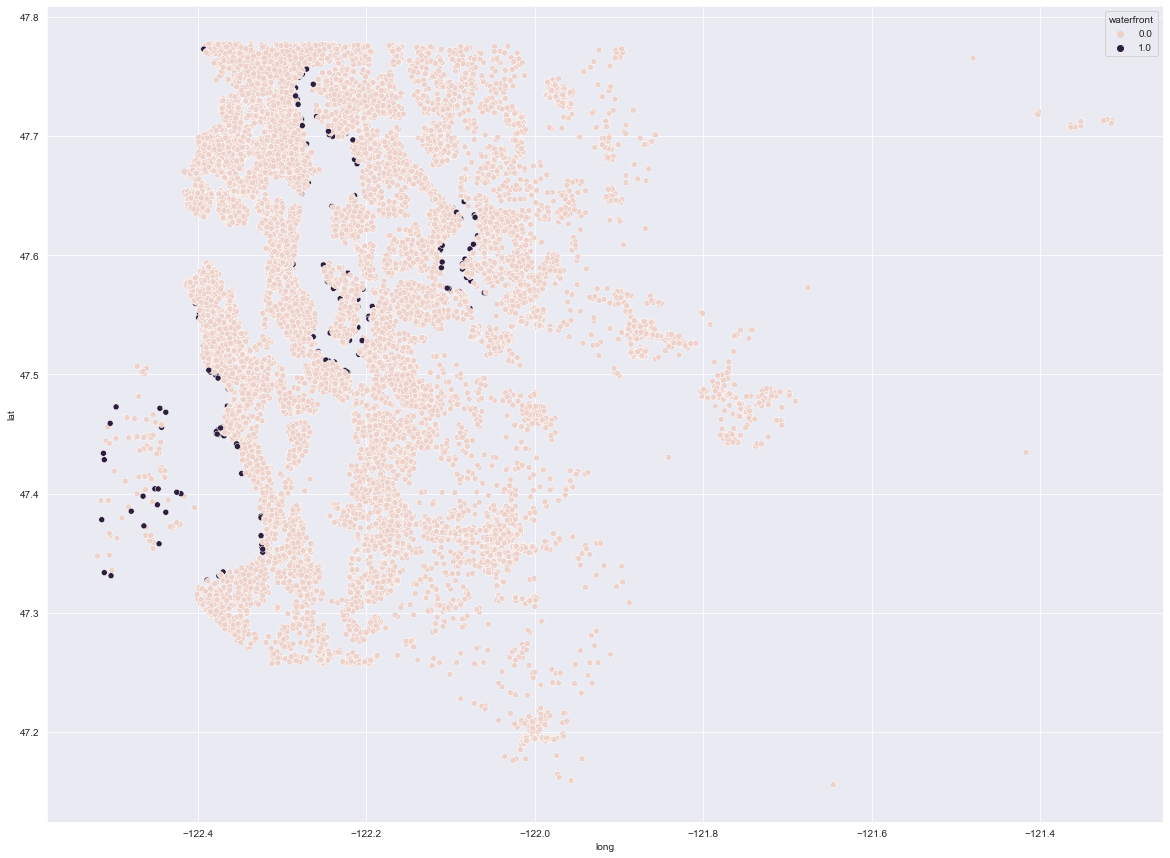

In [16]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

In [17]:
s = df.waterfront.value_counts(normalize=True)
df['waterfront_fillna'] = df['waterfront']
df.loc[df.waterfront.isna(), 'waterfront_fillna'] = np.random.choice(s.index, p=s.values, size=df.waterfront.isna().sum())

In [18]:
df['waterfront_fillna'].value_counts(normalize = True)

0.0    0.992406
1.0    0.007594
Name: waterfront_fillna, dtype: float64


Now that we replicated the existing distribution of waterfront, we can drop the original column and rename the new one accordingly.

In [19]:
df.drop(columns=['waterfront'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   view               21534 non-null  float64
 8   condition          21597 non-null  int64  
 9   grade              21597 non-null  int64  
 10  sqft_above         21597 non-null  int64  
 11  sqft_basement      21597 non-null  object 
 12  yr_built           21597 non-null  int64  
 13  yr_renovated       17755 non-null  float64
 14  zipcode            21597 non-null  int64  
 15  lat                21597 non-null  float64
 16  long               215

In [21]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront_fillna'],
      dtype='object')

In [22]:
df.columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront']

In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

<AxesSubplot:xlabel='long', ylabel='lat'>

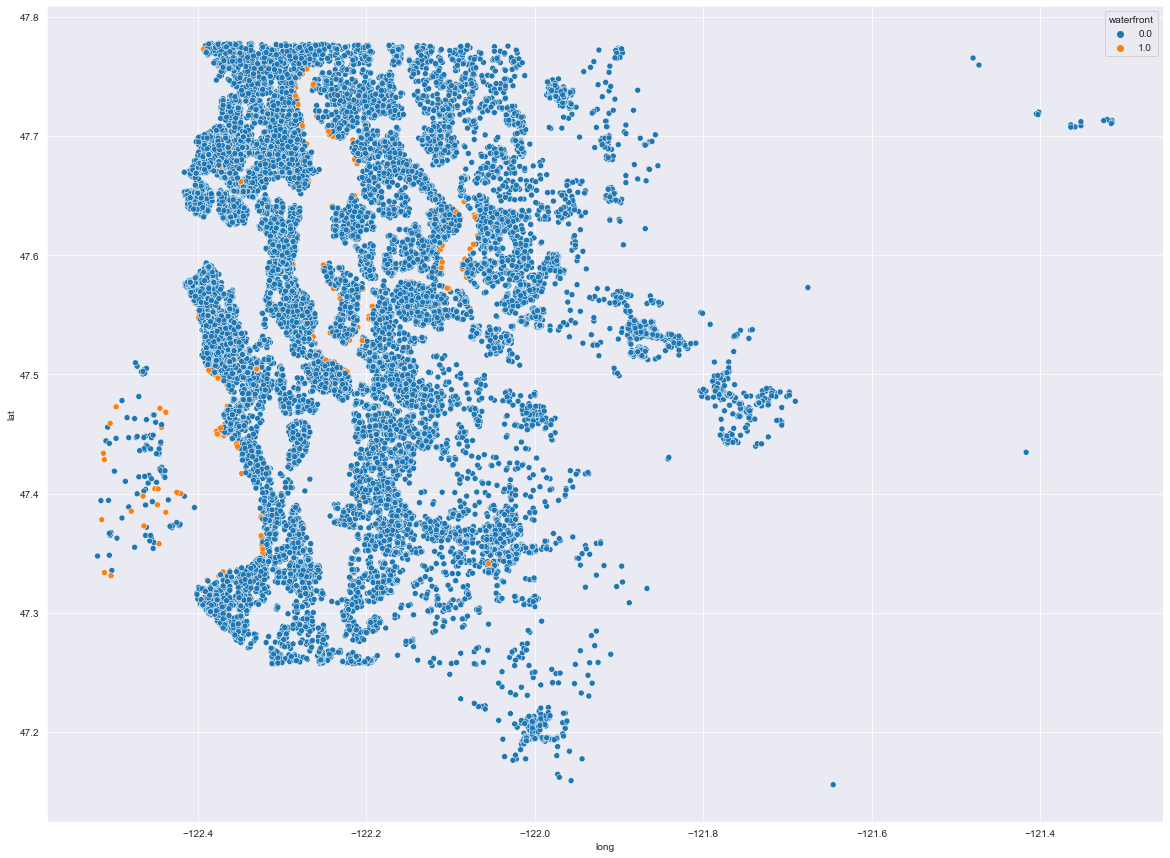

In [24]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

## Dealing with bathrooms data type

In [25]:
df['bathrooms'] = df['bathrooms'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Dealing with floors data type

In [26]:
df['floors'] = df['floors'].astype('int64')
df['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21592    3
21593    2
21594    2
21595    2
21596    2
Name: floors, Length: 21597, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Dealing with sqft_basement data type

In [28]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
704.0     0.000046
2400.0    0.000046
556.0     0.000046
2196.0    0.000046
276.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [29]:
# df['sqft_basement']
print (df.sqft_basement[pd.to_numeric(df.sqft_basement, errors='coerce').isnull()])
# print(df.dtypes)

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object


In [30]:
df.sqft_basement[pd.to_numeric(df.sqft_basement, errors='coerce').isnull()].value_counts()

?    454
Name: sqft_basement, dtype: int64

We can see that 454 values in the sqft_basement are missing and have the character '?' that needs to be taken care of.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [32]:
df['sqft_basement'] = pd.to_numeric(df.sqft_basement, errors='coerce')
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [33]:
df['sqft_basement'].isna().value_counts()

False    21143
True       454
Name: sqft_basement, dtype: int64

In [34]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
915.0     0.000047
295.0     0.000047
1281.0    0.000047
2130.0    0.000047
906.0     0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

From the data above since the median is 0 we are going to replace the nan values by 0 meaning they don't have a basement.

In [36]:
df.sqft_basement.fillna(value = 0.0, inplace=True)

In [37]:
df.sqft_basement.value_counts(normalize = True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Dealing with the yr_renovated

In [39]:
df['yr_renovated'] = pd.to_numeric(df.yr_renovated, errors='coerce')
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

we would need to remove the null values and after that convert the data type to int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

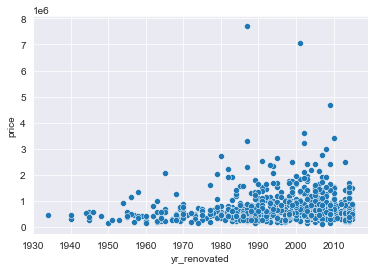

In [41]:
sns.scatterplot(x = "yr_renovated", y = "price", data = df[df['yr_renovated'] > 0])


Missing a lot of values here ~ 20%. Options include:

1. Filling missing values with just a zero (makes a lot more sense here as 96% of the homes have never been renovated)
2. Turn into a category of whether house has been renovated
3. Drop missing values.
4. Drop column
5. Turn into a category of whether house was renovated within the last 10 years

<AxesSubplot:xlabel='long', ylabel='lat'>

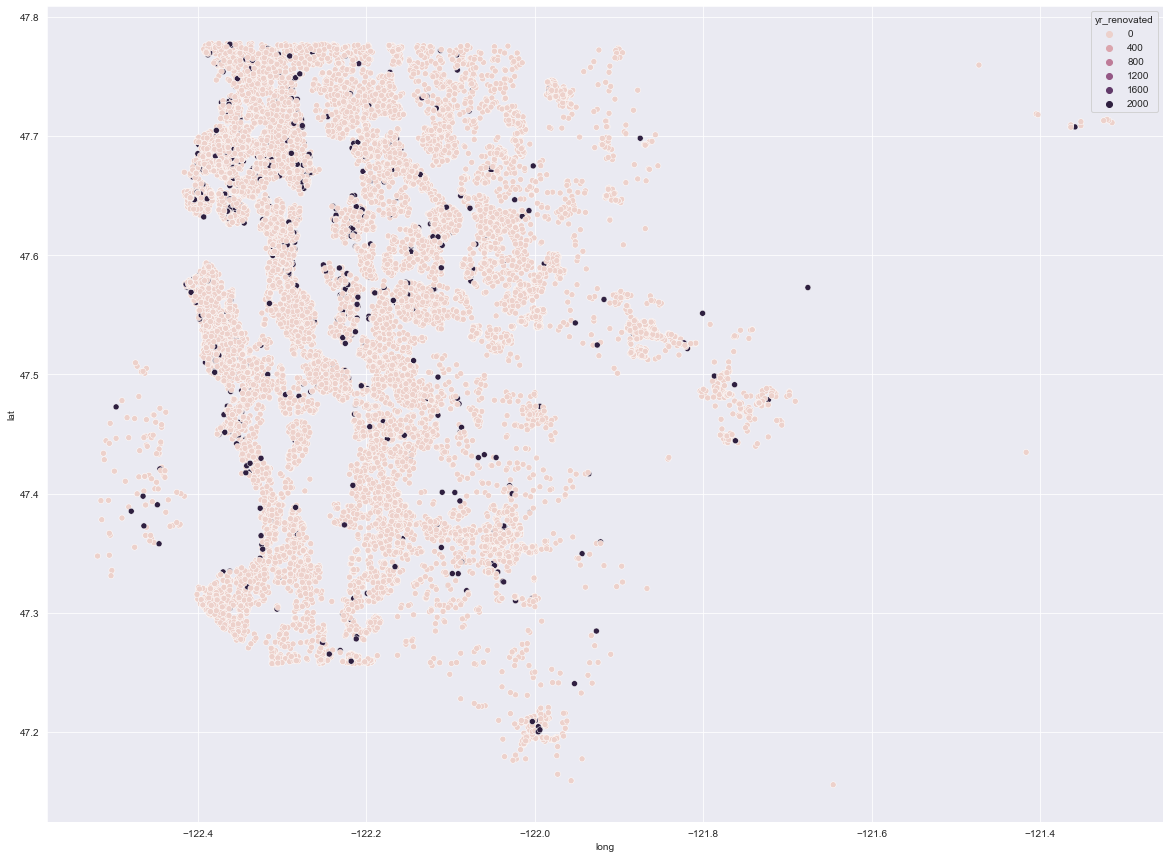

In [42]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "yr_renovated",  data = df)

In [70]:
df.zipcode.value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

<AxesSubplot:xlabel='price', ylabel='zipcode'>

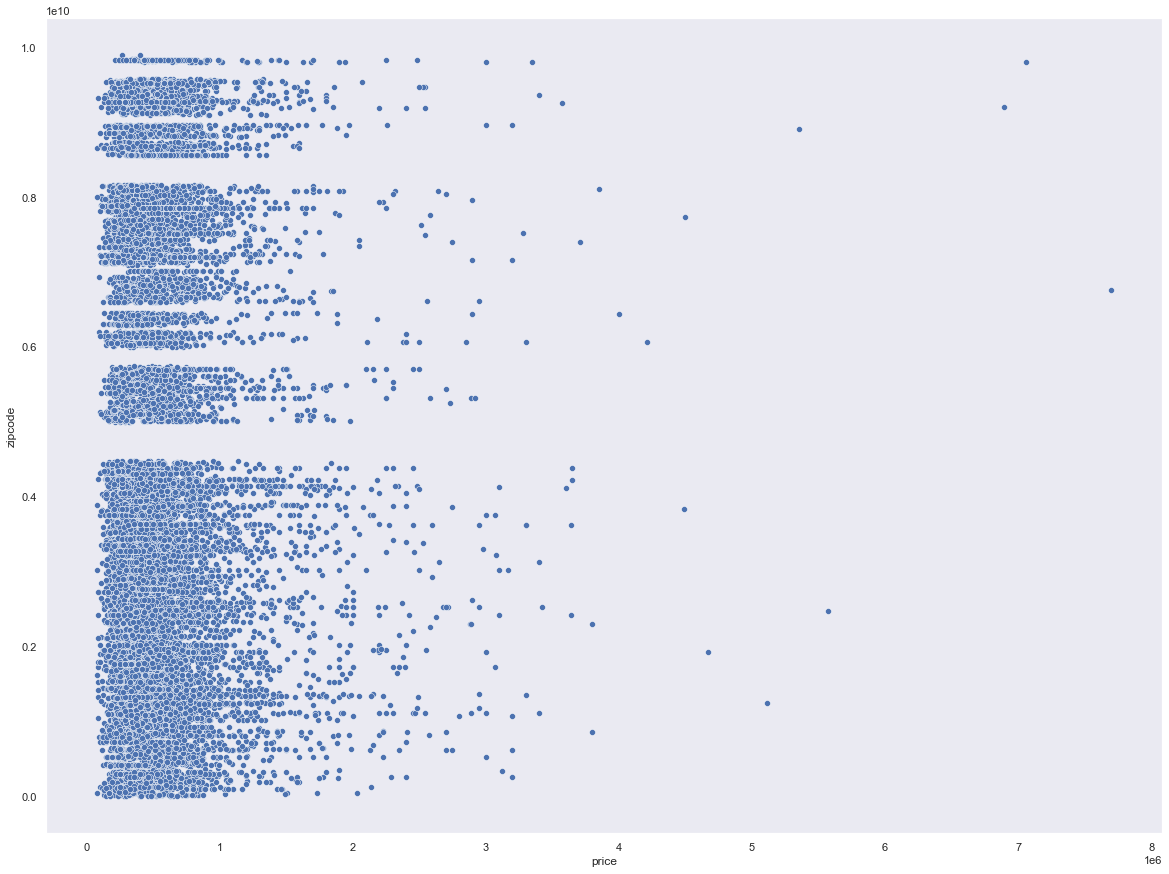

In [73]:

plt.figure(figsize=(20, 15))
sns.scatterplot(y = "zipcode", x = "price",data =  df.loc[df.zipcode > 90000])

Looks like most of the renovated houses are close to the waterfront. This might mean their prices tend to be higher. Lets investigate a bit more

lets look at the age of a building according to the year of renovation

In [43]:
yrs_since_reno = 2015 - df['yr_renovated']

In [44]:
yrs_since_reno.value_counts(normalize=True)

2015.0    0.958096
1.0       0.004112
2.0       0.001746
12.0      0.001746
8.0       0.001690
            ...   
62.0      0.000056
65.0      0.000056
39.0      0.000056
69.0      0.000056
71.0      0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [51]:
df.yr_renovated.fillna(value=0.0, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [34]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  int64  
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21534 non-null  int64  
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  sqft_basement  21534 non-null  float64
 12  yr_built       21534 non-null  int64  
 13  yr_renovated   21534 non-null  float64
 14  zipcode        21534 non-null  int64  
 15  lat            21534 non-null  float64
 16  long           21534 non-null  float64
 17  sqft_living15  21534 non-null  int64  
 18  sqft_l

ok, now our data looks all clean. Moving on to the next step would be to explore the data and see if we have any multicollinearity 

## Exploring data

Dealing with multicollinearity

<AxesSubplot:>

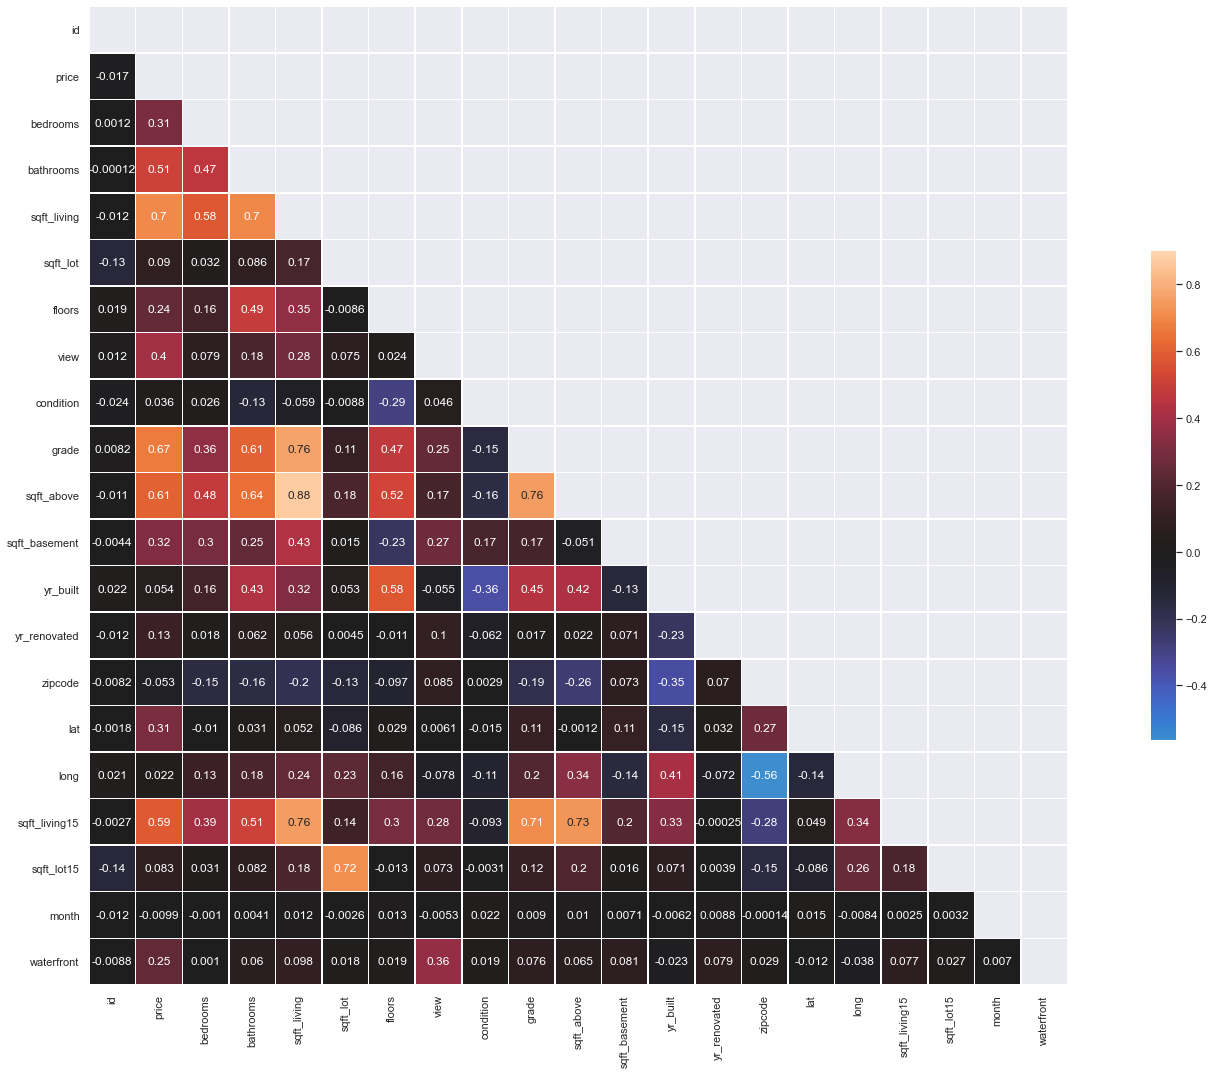

In [48]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=0.9, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
# plt.figure(figsize=(30,20))
# sns.pairplot(df)

In [56]:
#droping the sqft_above column since it is highly correlated with sqft_living and 
#and it is irrelevant to our analysis as compared
df.drop(columns=["sqft_above"], inplace= True, axis = 1)


KeyError: "['sqft_above'] not found in axis"

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  int64  
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21534 non-null  int64  
 9   grade          21534 non-null  int64  
 10  sqft_basement  21534 non-null  float64
 11  yr_built       21534 non-null  int64  
 12  yr_renovated   21534 non-null  float64
 13  zipcode        21534 non-null  int64  
 14  lat            21534 non-null  float64
 15  long           21534 non-null  float64
 16  sqft_living15  21534 non-null  int64  
 17  sqft_lot15     21534 non-null  int64  
 18  month 